# Runge-Kutta 2nd and 4th Order

In [36]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# Heun's method
def heun(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i], y[i-1] + h * k1)
        y[i] = y[i-1] + h * (k1 + k2) / 2
    return y

In [38]:
# Midpoint method
def midpoint(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2 * k1)
        y[i] = y[i-1] + h * k2
    return y

In [39]:
# Ralston's method
def ralston(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + 3/4 * h, y[i-1] + 3/4 * h * k1)
        y[i] = y[i-1] + h * (k1 + 2 * k2) / 3
    return y

In [40]:
# Runge-Kutta 4th order method
def rk4(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2 * k1)
        k3 = f(t[i-1] + h/2, y[i-1] + h/2 * k2)
        k4 = f(t[i], y[i-1] + h * k3)
        y[i] = y[i-1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

In [41]:
# Define the function
def f(t, I):
    return 20 - 11 * I

In [49]:
# execute the methods
t = np.linspace(0, 1, 100) #You can change the range of t for different results
y0 = 0
y_heun = heun(f, y0, t)
y_midpoint = midpoint(f, y0, t)
y_ralston = ralston(f, y0, t)
y_rk4 = rk4(f, y0, t)

In [50]:
print(f"Heun's method: {y_heun[-1]:.7f}")
print(f"Midpoint method: {y_midpoint[-1]:.7f}")
print(f"Ralston's method: {y_ralston[-1]:.7f}")
print(f"Runge-Kutta 4th order method: {y_rk4[-1]:.7f}")

Heun's method: 1.8181507
Midpoint method: 1.8181507
Ralston's method: 1.8181507
Runge-Kutta 4th order method: 1.8181515


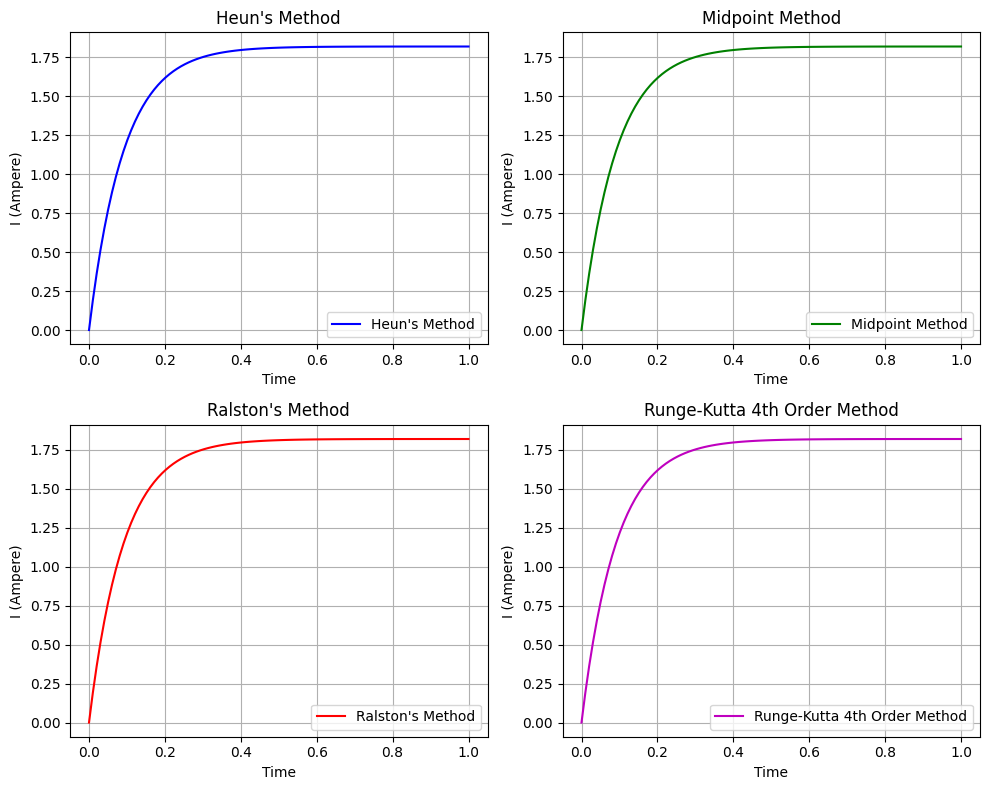

In [44]:
# Plot the results with a beautiful layout
plt.figure(figsize=(10, 8))

methods = {
    "Heun's Method": y_heun,
    "Midpoint Method": y_midpoint,
    "Ralston's Method": y_ralston,
    "Runge-Kutta 4th Order Method": y_rk4
}

colors = ['b', 'g', 'r', 'm']

for i, (title, y_values) in enumerate(methods.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(t, y_values, label=title, color=colors[i-1])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('I (Ampere)')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()
